# K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable $k$. The algorithm works iteratively to assign each data point to one of $k$ groups based on the features $X$ provided. Data points are clustered based on feature similarity.

<img src="../../../assets/KMeans.png" style="display: block; margin-left: auto; margin-right: auto; max-width:800px">

Steps of the K-Means Algorithm:

1. Centroids Initialization $k$ random points are generated as centroids.
2. Clusters Assignment  Each data point is assigned to the closest centroid with respect to the Euclidean distance $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$.
3. Recalculate Centroids The centroids are recalculated by taking the mean of all data points assigned to that centroid $\mu_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i$.
4. Repeat Steps 2 and 3 until convergence.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

class KMeans:
    '''
    K-Means Clustering Algorithm

    Attributes:
        k (int): Number of clusters
        data (np.ndarray): Data points to cluster
        max_iter (int): Maximum number of iterations

    Methods:
        _initialize_centroids() -> np.ndarray: Initialize centroids by selecting the first k points
        _initialize_clusters() -> dict: Initialize clusters as empty lists
        _euclidean_distance(a: np.ndarray, b: np.ndarray) -> float: Calculate the Euclidean distance between two points
        _assign_cluster(point: np.ndarray) -> int: Assign a data point to the nearest centroid
        _update_centroids() -> None: Update centroids by calculating the mean of the points in each cluster
        fit() -> None: Fit the model to the data
        predict(point: np.ndarray) -> int: Predict the cluster for a given data point
        get_clusters() -> dict: Get the clusters
        get_centroids() -> np.ndarray: Get the centroids
        plot(X: np.ndarray, y: np.ndarray) -> None: Plot the data points and the clusters
    '''
    def __init__(self, k: int, data: np.ndarray, max_iter: int = 300) -> None:
        self.k = k
        self.data = data
        self.max_iter = max_iter
        self.centroids = self._initialize_centroids()
        self.clusters = self._initialize_clusters()

    def _initialize_centroids(self) -> np.ndarray:
        '''Initialize centroids by selecting the first k points'''
        return self.data[:self.k]

    def _initialize_clusters(self) -> dict:
        '''Initialize clusters as empty lists'''
        clusters = {}
        for i in range(self.k):
            clusters[i] = []
        return clusters

    def _euclidean_distance(self, a: np.ndarray, b: np.ndarray) -> float:
        '''Calculate the Euclidean distance between two points'''
        return sum((a - b) ** 2 for a, b in zip(a, b)) ** 0.5

    def _assign_cluster(self, point: np.ndarray) -> int:
        '''Assign a data point to the nearest centroid'''
        distances = [self._euclidean_distance(point, centroid) for centroid in self.centroids]
        return distances.index(min(distances))

    def _update_centroids(self) -> None:
        '''Update centroids by calculating the mean of the points in each cluster'''
        for i in range(self.k):
            self.centroids[i] = sum(self.clusters[i]) / len(self.clusters[i])
    
    def fit(self) -> None:
        '''Fit the model to the data'''
        for _ in range(self.max_iter):
            self.clusters = self._initialize_clusters()  # Reset clusters

            for point in self.data:
                cluster = self._assign_cluster(point)
                self.clusters[cluster].append(point)

            self._update_centroids()

    def predict(self, point: np.ndarray) -> int:
        '''Predict the cluster for a given data point'''
        return self._assign_cluster(point)

    def get_clusters(self) -> dict:
        '''Get the clusters'''
        return self.clusters

    def get_centroids(self) -> np.ndarray:
        '''Get the centroids'''
        return self.centroids

    def plot(self, X: np.ndarray, y: np.ndarray) -> None:
        '''Plot the data points and the clusters'''
        y_pred = np.array([self.predict(point) for point in X])

        correct = X[y == y_pred]
        wrong = X[y != y_pred]
        print(f'Correct: {len(correct)}\nWrong: {len(wrong)}')

        # Plotting
        plt.scatter(correct[:, 0], correct[:, 1], color='green', label='Correct')
        plt.scatter(wrong[:, 0], wrong[:, 1], color='red', label='Wrong')
        plt.legend()
        plt.show()
        
        # Confusion Matrix
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
        plt.show()
        

## Dataset Breast Cancer Wisconsin

In [66]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Train and Test Data

Accuracy: 0.8596491228070176
Correct: 147
Wrong: 24


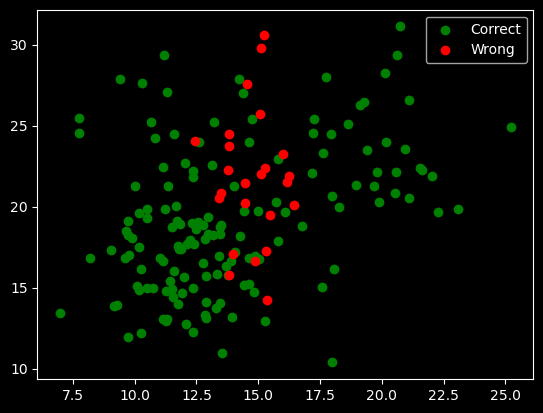

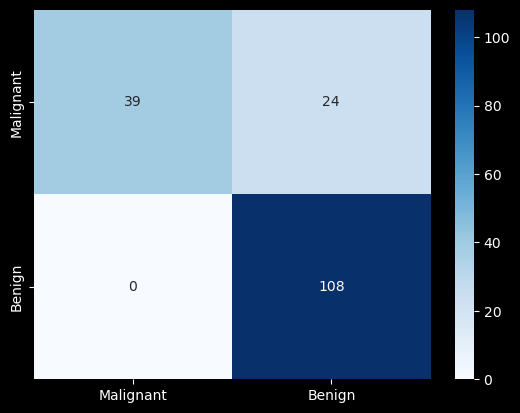

In [67]:
from sklearn.metrics import accuracy_score

kmeans = KMeans(k=2, data=X_train)
kmeans.fit()

y_pred = np.array([kmeans.predict(point) for point in X_test])

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

kmeans.plot(X_test, y_test)

## Acknowledgements

This Dataset is public available at the [UCI Machine Learning Repository](https://doi.org/10.24432/C5DW2B). 

The dataset was created by Wolberg William, Mangasarian Olvi, Street Nick, and Street W (1995). Breast Cancer Wisconsin (Diagnostic).